In [10]:
from google.colab import files

# Upload the zip file
uploaded = files.upload()

Saving archive.zip to archive.zip


In [11]:
import zipfile
import io

# Replace 'your_uploaded_file.zip' with the actual file name
with zipfile.ZipFile(io.BytesIO(uploaded['archive.zip']), 'r') as zip_ref:
    zip_ref.extractall('Extracted_Folder2')

In [1]:
import numpy as np
from PIL import Image
import random
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score,classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import seaborn as sns
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [2]:
import os
import cv2
import numpy as np

# Path to the main folder
main_folder_path = '/content/Extracted_Folder2/PLD_3_Classes_256/Training'

# List to store images and corresponding labels
images_train = []
labels_train = []

# Iterate over subfolders
for folder_name in os.listdir(main_folder_path):
    folder_path = os.path.join(main_folder_path, folder_name)

    # Check if it's a directory
    if os.path.isdir(folder_path):
        # Get the label (class) for this folder
        labels = folder_name  

        # Iterate over images in the folder
        for filename in os.listdir(folder_path):
            image_path = os.path.join(folder_path, filename)

            # Read the image using OpenCV
            image = cv2.imread(image_path)

            # (Optional) Preprocess the image if needed

            # Append the image and label to the lists
            images_train.append(image)
            labels_train.append(labels)

# Convert lists to numpy arrays
x_train = np.array(images_train)
labels_train = np.array(labels_train)

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(labels_train)

print(len(x_train))



3251


In [3]:
# Path to the main folder
main_folder_path = '/content/Extracted_Folder2/PLD_3_Classes_256/Testing'

# List to store images and corresponding labels
images_test = []
labels_test = []

# Iterate over subfolders
for folder_name in os.listdir(main_folder_path):
    folder_path = os.path.join(main_folder_path, folder_name)

    # Check if it's a directory
    if os.path.isdir(folder_path):
        # Get the label (class) for this folder
        labels = folder_name  

        # Iterate over images in the folder
        for filename in os.listdir(folder_path):
            image_path = os.path.join(folder_path, filename)

            # Read the image using OpenCV
            image = cv2.imread(image_path)

            # (Optional) Preprocess the image if needed

            # Append the image and label to the lists
            images_test.append(image)
            labels_test.append(labels)

# Convert lists to numpy arrays
x_test = np.array(images_test)
labels_test = np.array(labels_test)

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
y_test = label_encoder.fit_transform(labels_test)

# Now, 'x_train' contains your image data, and 'y_train_encoded' contains the corresponding one-hot encoded labels.
print(len(x_test))

405


In [4]:
# Path to the main folder
main_folder_path = '/content/Extracted_Folder2/PLD_3_Classes_256/Validation'

# List to store images and corresponding labels
images_valid = []
labels_valid = []

# Iterate over subfolders
for folder_name in os.listdir(main_folder_path):
    folder_path = os.path.join(main_folder_path, folder_name)

    # Check if it's a directory
    if os.path.isdir(folder_path):
        # Get the label (class) for this folder
        labels = folder_name  # Assuming folder names are like 'A', 'B', 'C', ...

        # Iterate over images in the folder
        for filename in os.listdir(folder_path):
            image_path = os.path.join(folder_path, filename)

            # Read the image using OpenCV
            image = cv2.imread(image_path)

            # (Optional) Preprocess the image if needed

            # Append the image and label to the lists
            images_valid.append(image)
            labels_valid.append(labels)

# Convert lists to numpy arrays
x_valid = np.array(images_valid)
labels_valid = np.array(labels_valid)

# (Optional) Apply one-hot encoding to labels if needed
# Example using sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
y_valid = label_encoder.fit_transform(labels_valid)

# Now, 'x_train' contains your image data, and 'y_train_encoded' contains the corresponding one-hot encoded labels.
print(len(x_valid))

416


In [5]:
print(x_train.shape,y_train.shape)
print(set(y_train))



(3251, 256, 256, 3) (3251,)
{0, 1, 2}


In [6]:
import numpy as np

# Assuming x_train contains your images and y_train contains corresponding labels

# Get the number of samples
num_samples = len(x_train)

# Generate random indices for shuffling
indices = np.arange(num_samples)
np.random.shuffle(indices)

# Shuffle x_train and y_train using the random indices
x_train_shuffled = x_train[indices]
y_train_shuffled = y_train[indices]

# Now, x_train_shuffled and y_train_shuffled are shuffled versions of your original x_train and y_train

In [7]:
# Assuming x_train contains your images and y_train contains corresponding labels

# Get the number of samples
num_samples = len(x_valid)

# Generate random indices for shuffling
indices = np.arange(num_samples)
np.random.shuffle(indices)

# Shuffle x_train and y_train using the random indices
x_valid_shuffled = x_valid[indices]
y_valid_shuffled = y_valid[indices]

# Now, x_train_shuffled and y_train_shuffled are shuffled versions of your original x_train and y_train

In [ ]:
#import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Define your data directory
data_dir = '/content/your_extracted_folder/PLD_3_Classes_256/Testing'

# Create an ImageDataGenerator with augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=50,
    width_shift_range=0.3,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.5,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Loop through each class folder
for class_folder in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_folder)

    # Check if the item in the directory is a folder
    if os.path.isdir(class_path):
        # Loop through each image in the class folder
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)

            # Load the image
            img = image.load_img(img_path)
            x = image.img_to_array(img)
            x = x.reshape((1,) + x.shape)

            # Generate augmented images and save them
            i = 0
            for batch in datagen.flow(x, save_to_dir=class_path, save_prefix='aug', save_format='jpeg'):
                i += 1
                if i > 1:  # Generate 3 augmented images per original image
                    break

# This code will augment your images and save them in the same class folder.

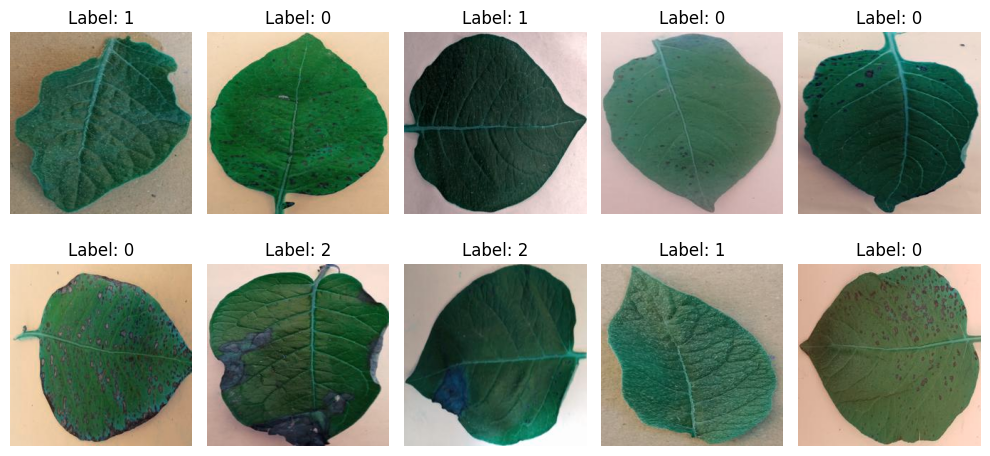

In [8]:
# Visualize sample images from the dataset
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()
for i in range(10):
    axes[i].imshow(x_train_shuffled[i].reshape(256, 256,3), cmap='gray')
    axes[i].set_title(f"Label: {(y_train_shuffled[i])}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

onehot_encoder = OneHotEncoder(sparse_output=False)
y_train_encoded = onehot_encoder.fit_transform(y_train_shuffled.reshape(-1, 1))
y_valid_encoded = onehot_encoder.fit_transform(y_valid_shuffled.reshape(-1, 1))
y_test_encoded = onehot_encoder.fit_transform(y_test.reshape(-1, 1))

In [10]:
# Build the CNN model
model = Sequential()

model.add(Conv2D(30, (3, 3), activation='relu', input_shape=(256, 256, 3)))  # 8 filters of size 3x3, ReLU activation function
model.add(MaxPooling2D((2, 2)))  # Max pooling with pool size 2x2

model.add(Conv2D(30, (3, 3), activation='relu'))  # 16 filters of size 3x3, ReLU activation
model.add(MaxPooling2D((2, 2)))  # Max pooling

model.add(Flatten())  # Flatten the output from 2D to 1D

model.add(Dense(100, activation='relu'))  # Fully connected layer with 50 units, ReLU activation
#model.add(Dropout(0.3))  # Dropout layer with a dropout rate of 0.5
model.add(Dense(75, activation='relu'))  # Fully connected layer with 40 units, ReLU activation
#model.add(Dropout(0.1))  # Dropout layer with a dropout rate of 0.5
model.add(Dense(50, activation='relu'))  # Fully connected layer with 50 units, ReLU activation
model.add(Dense(3, activation='softmax'))  # Output layer with 1 units (classes), softmax activation

In [11]:
model.summary() # print the archticture of model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 30)      840       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 30)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 30)      8130      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 30)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 115320)            0         
                                                                 
 dense (Dense)               (None, 20)                2

In [12]:
# print trainable parameters of model
for i in model.layers:
    print(f"Layer {i.name} : {i.count_params()} trainable parameters")
    print('----------------------------------------------')

Layer conv2d : 840 trainable parameters
----------------------------------------------
Layer max_pooling2d : 0 trainable parameters
----------------------------------------------
Layer conv2d_1 : 8130 trainable parameters
----------------------------------------------
Layer max_pooling2d_1 : 0 trainable parameters
----------------------------------------------
Layer flatten : 0 trainable parameters
----------------------------------------------
Layer dense : 2306420 trainable parameters
----------------------------------------------
Layer dense_1 : 315 trainable parameters
----------------------------------------------
Layer dense_2 : 160 trainable parameters
----------------------------------------------
Layer dense_3 : 33 trainable parameters
----------------------------------------------


In [11]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
# Train the model
Epochs = 3
model.fit(x_train_shuffled,  y_train_encoded, batch_size=64, epochs=Epochs,validation_data=(x_valid_shuffled,y_valid_encoded))

Epoch 1/3
51/51 [==============================] - 4s 84ms/step - loss: 0.0402 - accuracy: 0.9902 - val_loss: 2.0361 - val_accuracy: 0.6202
Epoch 2/3
51/51 [==============================] - 4s 77ms/step - loss: 0.0189 - accuracy: 0.9960 - val_loss: 2.4318 - val_accuracy: 0.6611
Epoch 3/3
51/51 [==============================] - 4s 77ms/step - loss: 0.0158 - accuracy: 0.9960 - val_loss: 2.1734 - val_accuracy: 0.5865


In [39]:
# Evaluate the model
loss, accuracy = model.evaluate(x_train_shuffled, y_train_encoded)
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Loss: ' ,loss)

102/102 [==============================] - 1s 13ms/step - loss: 0.0689 - accuracy: 0.9831
Accuracy: 98.31%
Loss:  0.06891752779483795


In [40]:
y_pred = model.predict(x_train_shuffled)
import numpy as np

# Convert one-hot encoded label to integer label
int_label = np.argmax(y_pred,axis=1)

# Print the integer label
print("Integer label:", int_label)


102/102 [==============================] - 2s 15ms/step
Integer label: [1 0 1 ... 2 0 1]


In [41]:
print(int_label.shape,y_pred.shape)

(3251,) (3251, 3)


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1303
           1       0.98      0.97      0.98       816
           2       0.99      0.98      0.98      1132

    accuracy                           0.98      3251
   macro avg       0.98      0.98      0.98      3251
weighted avg       0.98      0.98      0.98      3251



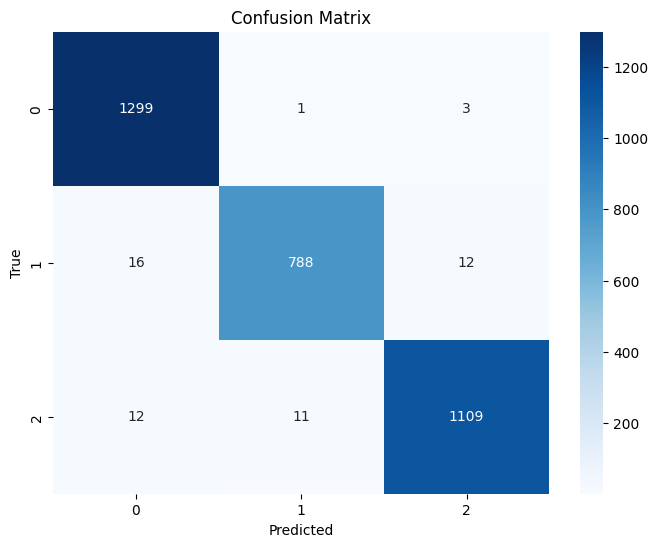

In [42]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_train_shuffled, int_label)

# Print the classification report
print(report)

from sklearn.metrics import confusion_matrix



# Create confusion matrix
cm = confusion_matrix(y_train_shuffled, int_label)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(int_label))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

